<a href="https://colab.research.google.com/github/morae00/AIB_TP1/blob/KKU/mulit_classification_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ReLU와 softmax는 각각 은닉 레이어와 출력 레이어에서 매우 흔히 사용되는 활성화 함수입니다. 그러나 다른 활성화 함수들도 있으며, 사용하는 문제나 상황에 따라 더 좋은 결과를 가져올 수 있습니다:

Sigmoid: Sigmoid 함수는 출력을 0과 1 사이로 제한합니다. 이는 이진 분류 문제의 출력 레이어에서 유용할 수 있습니다. 그러나 Sigmoid 함수는 그래디언트 소실 문제를 야기할 수 있으므로, 은닉 레이어에서는 주로 사용되지 않습니다.

Tanh (Hyperbolic Tangent): Tanh 함수는 출력을 -1과 1 사이로 제한합니다. 이는 데이터를 중심으로 정규화할 때 유용할 수 있습니다. 그러나 Sigmoid 함수와 마찬가지로, Tanh 함수도 그래디언트 소실 문제를 야기할 수 있습니다.

Leaky ReLU: Leaky ReLU는 ReLU의 변형으로, 음수 값에 대해서도 작은 그래디언트를 허용합니다. 이는 '죽은' ReLU 문제를 완화하는 데 도움이 될 수 있습니다.

ELU (Exponential Linear Unit): ELU도 ReLU의 변형으로, 음수 값에 대해 지수 감소를 적용합니다. 이는 그래디언트 소실 문제를 완화하고 ReLU의 '죽은' 뉴런 문제를 해결하는 데 도움이 될 수 있습니다.

Swish: Swish는 Google이 제안한 새로운 활성화 함수로, 일부 경우에서 ReLU보다 우수한 성능을 보여주었습니다.

Softplus: Softplus는 ReLU의 부드러운 버전으로, 출력이 음수일 때 그래디언트를 0으로 만드는 대신 그래디언트를 완만하게 0으로 근사시킵니다.

출력 레이어에서는 일반적으로 softmax 활성화 함수가 다중 클래스 분류 문제에 가장 적합합니다. 이는 softmax 함수가 모든 출력 클래스에 대해 확률 분포를 생성하므로, 각 입력 샘플이 각 클래스에 속할 확률을 제공합니다. 이진 분류 문제의 경우, sigmoid 활성화 함수를 사용할 수 있습니다.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


## Relu

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('/content/mulit_classification_data.csv')

# Separate features and target
X = data.iloc[:, 0:27]
y = data.iloc[:, 27:-1]

# Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[-0.80132703, -0.90244255, -0.78380262, ..., -0.5657391 ,
          1.12624705, -0.82100684],
        [ 1.05630025,  1.02519872,  0.07814975, ..., -0.73688614,
          1.08052616, -1.30043256],
        [-1.0184024 , -0.80797004,  0.59646044, ..., -1.46720672,
         -0.38052523,  1.22163552],
        ...,
        [ 0.08426364,  0.00811167,  0.30298501, ...,  0.89869644,
          0.20443322, -1.10153129],
        [-0.67453964, -0.78183934,  0.81377141, ...,  0.0333754 ,
          0.0840797 , -1.1492676 ],
        [ 0.48191498,  0.45032343, -0.46783943, ...,  0.3515052 ,
          0.03432461,  0.72040432]]),
 array([[ 1.04861617,  1.07746011, -0.25721234, ...,  0.48730449,
         -0.35094112,  1.22163552],
        [ 1.92268071,  1.99404449, -0.74015566, ...,  0.94822324,
         -1.53228824,  1.22163552],
        [ 2.00912665,  2.03022545,  0.25072082, ...,  0.14101631,
         -1.23510245, -0.96775177],
        ...,
        [-1.0184024 , -0.8140002 , -0.00759073, ..., -

In [22]:
y_train

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
1917,0,0,0,0,0,0
808,0,0,0,1,0,0
680,0,0,1,0,0,0
534,0,0,1,0,0,0
192,0,1,0,0,0,0
...,...,...,...,...,...,...
1130,0,0,0,0,0,1
1294,0,0,0,0,0,0
860,0,0,0,0,1,0
1459,0,0,0,0,0,0


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=27),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(6, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy, Precision, Recall = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)

# Make predictions
predictions = model.predict(X_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               3584      
                                                                 
 batch_normalization_29 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 batch_normalization_30 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_31 (Bat  (None, 16)              

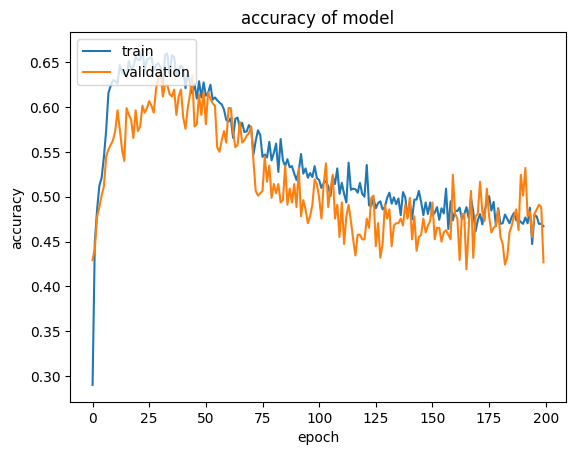

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

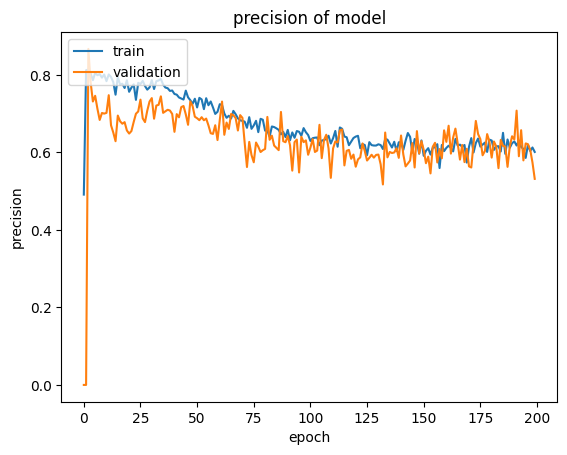

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

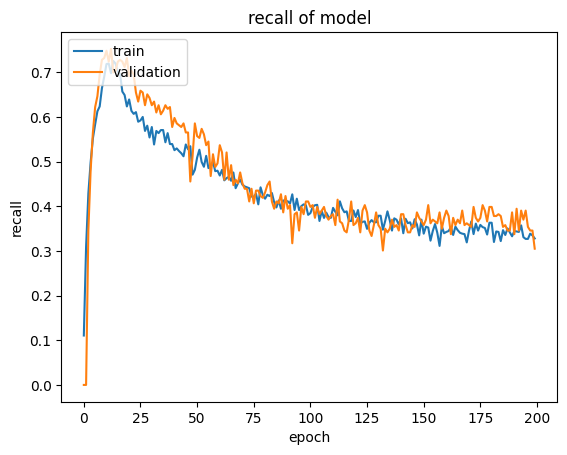

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('/content/mulit_classification_data.csv')

# Separate features and target
X = data.iloc[:, 0:27]
y = data.iloc[:, 27:]

# Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[-0.80132703, -0.90244255, -0.78380262, ..., -0.5657391 ,
          1.12624705, -0.82100684],
        [ 1.05630025,  1.02519872,  0.07814975, ..., -0.73688614,
          1.08052616, -1.30043256],
        [-1.0184024 , -0.80797004,  0.59646044, ..., -1.46720672,
         -0.38052523,  1.22163552],
        ...,
        [ 0.08426364,  0.00811167,  0.30298501, ...,  0.89869644,
          0.20443322, -1.10153129],
        [-0.67453964, -0.78183934,  0.81377141, ...,  0.0333754 ,
          0.0840797 , -1.1492676 ],
        [ 0.48191498,  0.45032343, -0.46783943, ...,  0.3515052 ,
          0.03432461,  0.72040432]]),
 array([[ 1.04861617,  1.07746011, -0.25721234, ...,  0.48730449,
         -0.35094112,  1.22163552],
        [ 1.92268071,  1.99404449, -0.74015566, ...,  0.94822324,
         -1.53228824,  1.22163552],
        [ 2.00912665,  2.03022545,  0.25072082, ...,  0.14101631,
         -1.23510245, -0.96775177],
        ...,
        [-1.0184024 , -0.8140002 , -0.00759073, ..., -

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=27),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy, Precision, Recall = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)

# Make predictions
predictions = model.predict(X_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1792      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_6 (Batc  (None, 16)              

## ELU

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('/content/mulit_classification_data.csv')

# Separate features and target
X = data.iloc[:, 0:27]
y = data.iloc[:, 27: -1]

# Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

# Define the model
model = Sequential([
    Dense(64, activation='ELU', input_dim=27),
    BatchNormalization(),
    Dense(32, activation='ELU'),
    BatchNormalization(),
    Dense(16, activation='ELU'),
    BatchNormalization(),
    Dense(8, activation='ELU'),
    BatchNormalization(),
    Dense(6, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy, Precision, Recall = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)

# Make predictions
predictions = model.predict(X_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                1792      
                                                                 
 batch_normalization_45 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_46 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_47 (Bat  (None, 16)             

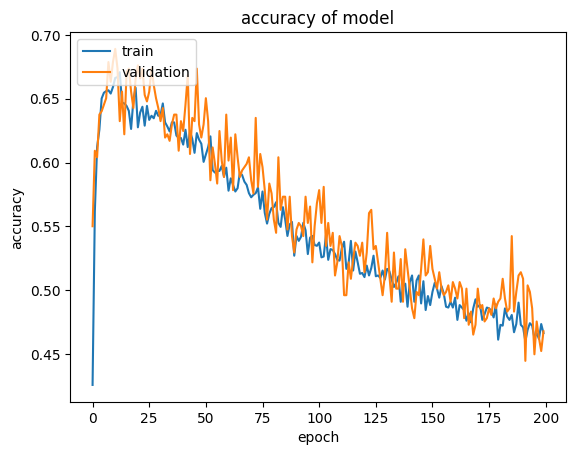

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

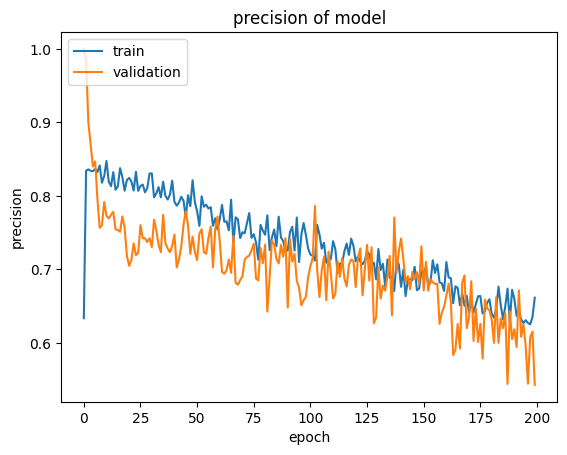

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

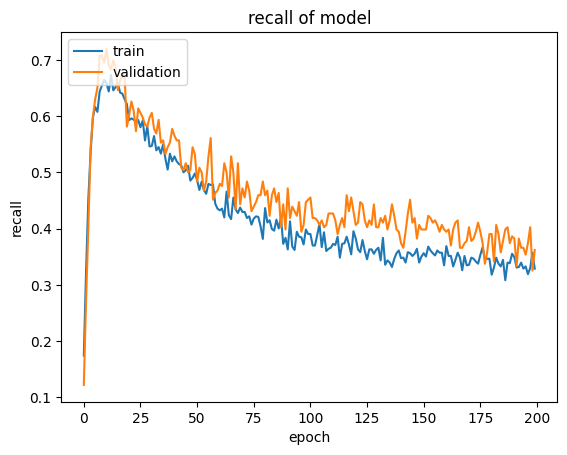

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Swish

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('/content/mulit_classification_data.csv')

# Separate features and target
X = data.iloc[:, 0:27]
y = data.iloc[:, 27: -1]

# Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

# Define the model
model = Sequential([
    Dense(64, activation='swish', input_dim=27),
    BatchNormalization(),
    Dense(32, activation='swish'),
    BatchNormalization(),
    Dense(16, activation='swish'),
    BatchNormalization(),
    Dense(8, activation='swish'),
    BatchNormalization(),
    Dense(6, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy, Precision, Recall = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)

# Make predictions
predictions = model.predict(X_test)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 64)                1792      
                                                                 
 batch_normalization_53 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_54 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_55 (Bat  (None, 16)             

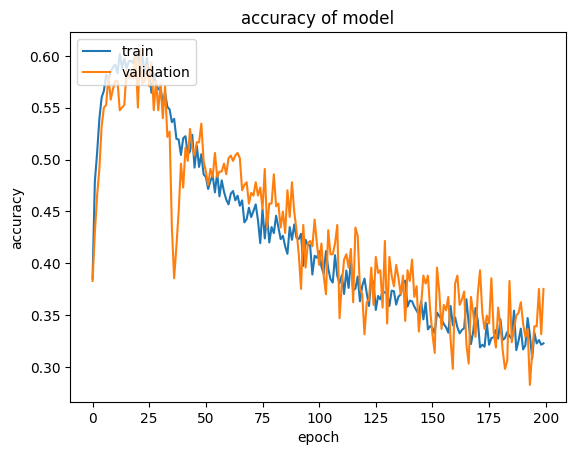

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

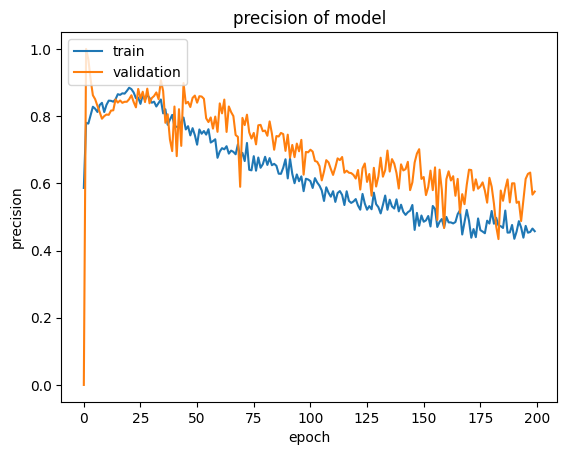

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

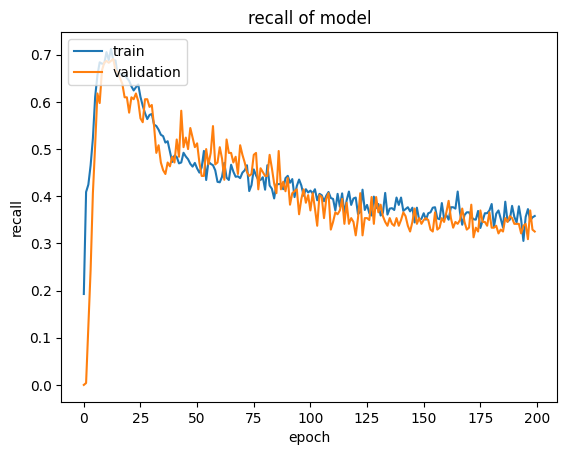

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## ?

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv('/content/mulit_classification_data.csv')

# Separate features and target
X = data.iloc[:, 0:27]
y = data.iloc[:, 27: -1]

# Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_dim=27),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(6, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy, Precision, Recall = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)

# Make predictions
predictions = model.predict(X_test)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 32)                896       
                                                                 
 batch_normalization_62 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_63 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_83 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_64 (Bat  (None, 8)              

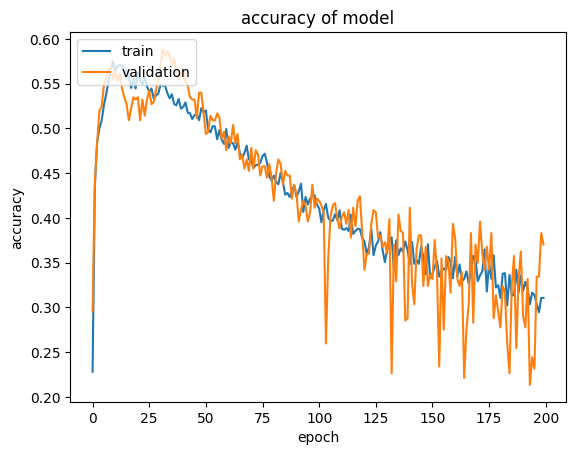

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

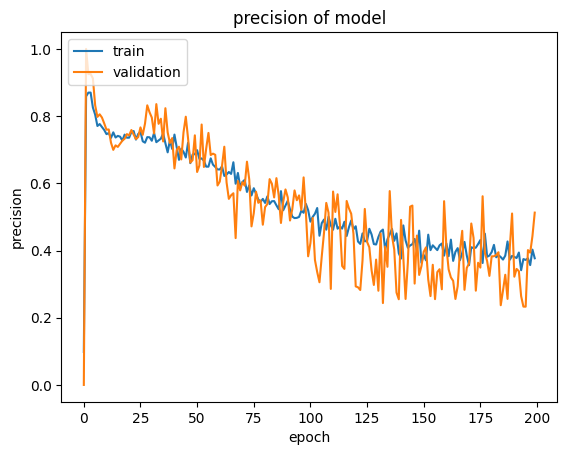

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

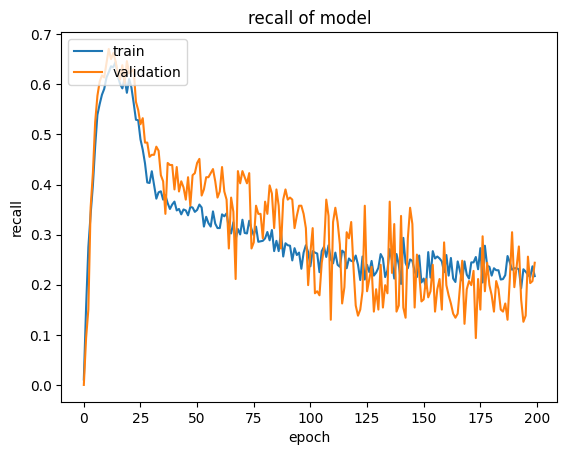

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from tensorflow.keras.utils import to_categorical

import numpy as np

## ?

In [7]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=27, kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dense(6, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=30)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, Precision, Recall = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/1000
49/49 [==============================] - 7s 24ms/step - loss: 7.0485 - accuracy: 0.2152 - precision: 0.2059 - recall: 0.0411 - val_loss: 6.4710 - val_accuracy: 0.3907 - val_precision: 1.0000 - val_recall: 0.0447
Epoch 2/1000
49/49 [==============================] - 0s 9ms/step - loss: 6.3837 - accuracy: 0.2713 - precision: 0.5473 - recall: 0.0793 - val_loss: 5.9258 - val_accuracy: 0.3445 - val_precision: 1.0000 - val_recall: 0.0894
Epoch 3/1000
49/49 [==============================] - 0s 9ms/step - loss: 5.7791 - accuracy: 0.3138 - precision: 0.7703 - recall: 0.1115 - val_loss: 5.3731 - val_accuracy: 0.2828 - val_precision: 1.0000 - val_recall: 0.0894
Epoch 4/1000
49/49 [==============================] - 0s 10ms/step - loss: 5.2110 - accuracy: 0.3267 - precision: 0.7987 - recall: 0.1243 - val_loss: 4.8437 - val_accuracy: 0.3033 - val_precision: 1.0000 - val_recall: 0.0976
Epoch 5/1000
49/49 [==============================] - 0s 8ms/step - loss: 4.6865 - accuracy: 0.3209 - 

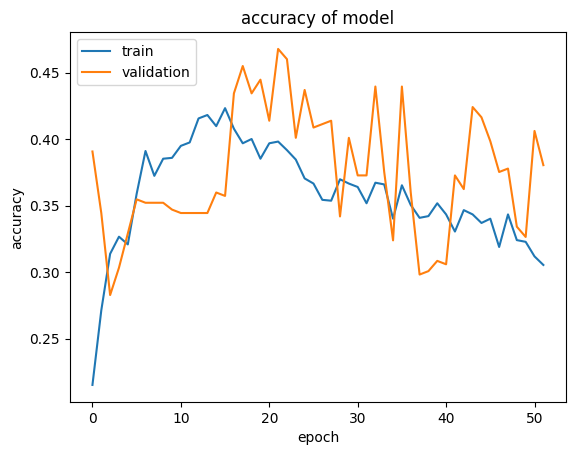

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

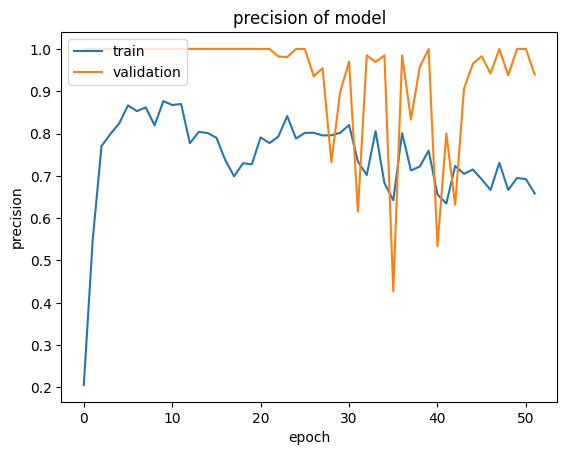

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

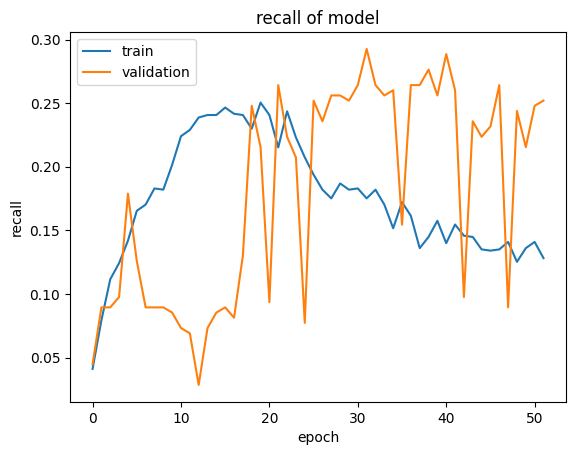

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## ????

In [27]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall

class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()




from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=27, kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dense(6, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), F1Score()])


# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='f1_score', patience=30)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, Precision, Recall, F1Score = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)
print("Test f1score: ", F1Score)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/1000
34/49 [===================>..........] - ETA: 0s - loss: 7.0782 - accuracy: 0.1452 - precision_7: 0.0747 - recall_7: 0.0183 - f1_score: 0.0294

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


49/49 [==============================] - 4s 14ms/step - loss: 6.9735 - accuracy: 0.1553 - precision_7: 0.0731 - recall_7: 0.0157 - f1_score: 0.0258 - val_loss: 6.4584 - val_accuracy: 0.1954 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/1000
49/49 [==============================] - 0s 5ms/step - loss: 6.3242 - accuracy: 0.1997 - precision_7: 0.2365 - recall_7: 0.0342 - f1_score: 0.0598 - val_loss: 5.8912 - val_accuracy: 0.2288 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/1000
49/49 [==============================] - 0s 4ms/step - loss: 5.6970 - accuracy: 0.2281 - precision_7: 0.4390 - recall_7: 0.0528 - f1_score: 0.0943 - val_loss: 5.3207 - val_accuracy: 0.2802 - val_precision_7: 1.0000 - val_recall_7: 0.0041 - val_f1_score: 0.0081
Epoch 4/1000
49/49 [==============================] - 0s 6ms/step - loss: 5.1134 - accuracy: 0.2726 - precision_7: 0.6639 - recall_7: 0.0773 - f1_score: 0.1385 - val_

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


13/13 [==============================] - 0s 3ms/step


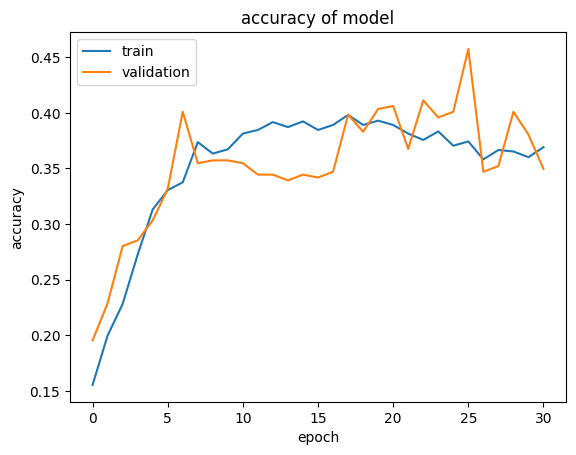

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

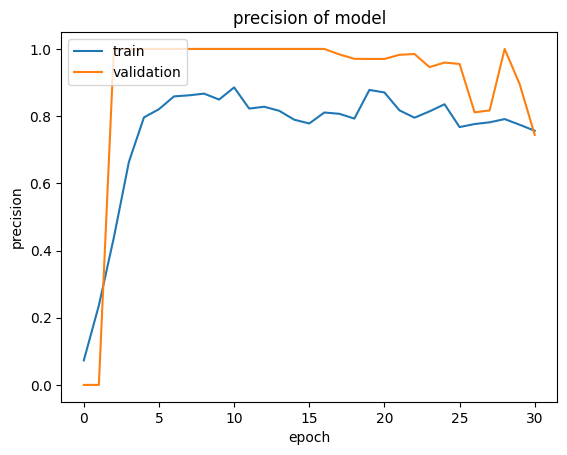

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision_7'])
plt.plot(history.history['val_precision_7'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

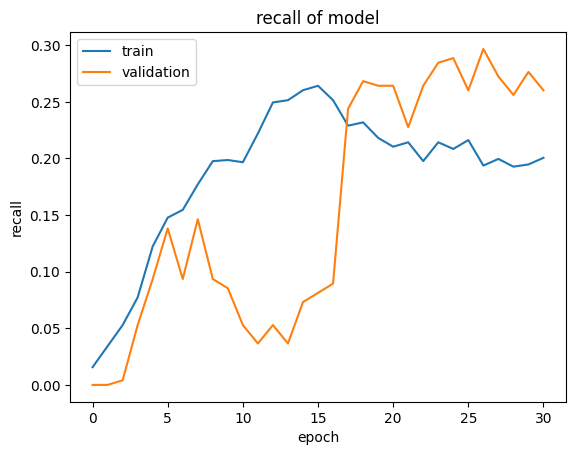

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall_7'])
plt.plot(history.history['val_recall_7'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

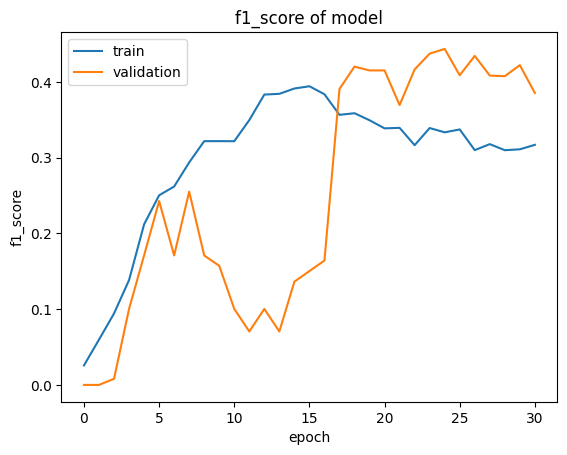

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('f1_score of model')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## ????????


In [1]:
!pip install imbalanced-learn

In [3]:
import numpy as np

In [9]:
# Import the required library for oversampling
from imblearn.over_sampling import SMOTE

# Before applying SMOTE, we need to revert the one-hot encoding of the target variable to its original form.
y_train_decoded = np.argmax(y_train.values, axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train_decoded)

# One-hot encode the oversampled target variable
y_train_oversampled = to_categorical(y_train_oversampled)

# Check the shape of the oversampled data
X_train_oversampled.shape, y_train_oversampled.shape


((3954, 27), (3954, 6))

In [11]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall

class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()




from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=27, kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dense(6, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), F1Score()])


# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_f1_score', patience=30)

# Train the model
history = model.fit(X_train_oversampled, y_train_oversampled, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, Precision, Recall, F1Score = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)
print("Test f1score: ", F1Score)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/1000
120/124 [============================>.] - ETA: 0s - loss: 7.3899 - accuracy: 0.2622 - precision_2: 0.3777 - recall_2: 0.0635 - f1_score: 0.1088

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


124/124 [==============================] - 4s 7ms/step - loss: 7.3693 - accuracy: 0.2645 - precision_2: 0.3795 - recall_2: 0.0637 - f1_score: 0.1091 - val_loss: 6.0054 - val_accuracy: 0.2853 - val_precision_2: 1.0000 - val_recall_2: 0.0285 - val_f1_score: 0.0553
Epoch 2/1000
124/124 [==============================] - 0s 4ms/step - loss: 6.0314 - accuracy: 0.3829 - precision_2: 0.7156 - recall_2: 0.1158 - f1_score: 0.1994 - val_loss: 4.8616 - val_accuracy: 0.3213 - val_precision_2: 1.0000 - val_recall_2: 0.0650 - val_f1_score: 0.1221
Epoch 3/1000
124/124 [==============================] - 0s 3ms/step - loss: 4.8524 - accuracy: 0.4600 - precision_2: 0.8277 - recall_2: 0.1737 - f1_score: 0.2872 - val_loss: 3.7697 - val_accuracy: 0.3496 - val_precision_2: 1.0000 - val_recall_2: 0.1585 - val_f1_score: 0.2737
Epoch 4/1000
124/124 [==============================] - 0s 3ms/step - loss: 3.7997 - accuracy: 0.5432 - precision_2: 0.8178 - recall_2: 0.2678 - f1_score: 0.4035 - val_loss: 2.8868 - va

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


13/13 [==============================] - 0s 2ms/step


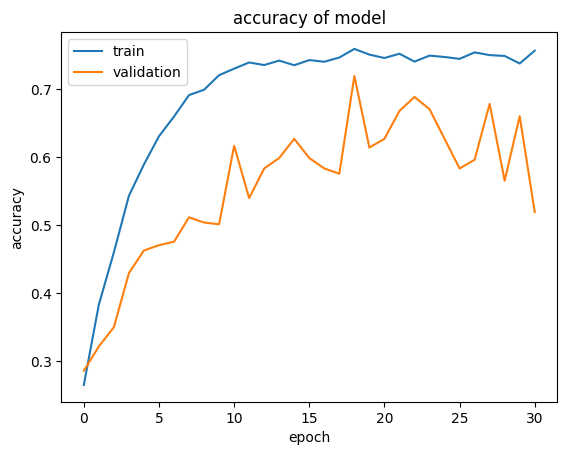

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

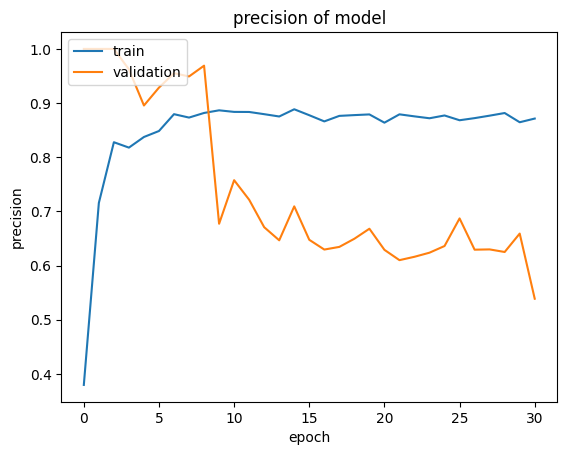

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision_2'])
plt.plot(history.history['val_precision_2'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

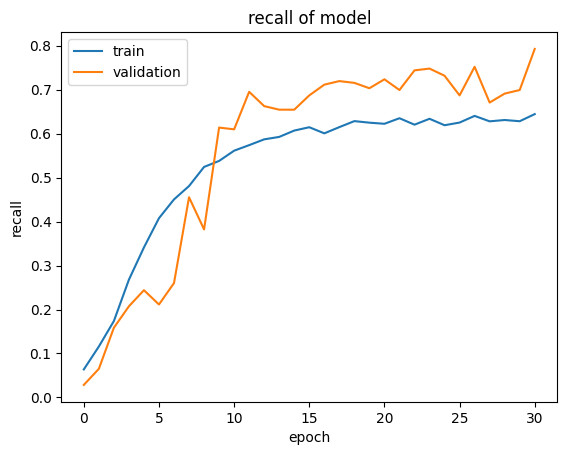

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall_2'])
plt.plot(history.history['val_recall_2'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

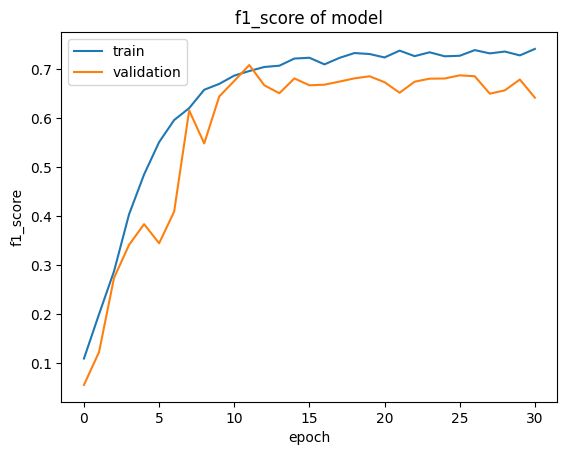

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('f1_score of model')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## ????????


In [38]:
# Import the required library for oversampling
from imblearn.over_sampling import SMOTE

# Before applying SMOTE, we need to revert the one-hot encoding of the target variable to its original form.
y_train_decoded = np.argmax(y_train.values, axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy='all', k_neighbors= 5)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train_decoded)

# One-hot encode the oversampled target variable
y_train_oversampled = to_categorical(y_train_oversampled)

# Check the shape of the oversampled data
X_train_oversampled.shape, y_train_oversampled.shape


((3954, 27), (3954, 6))

In [39]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall

class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()




from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=27, kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    BatchNormalization(),
    Dense(6, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', F1Score()])


# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_f1_score', patience=50)

# Train the model
history = model.fit(X_train_oversampled, y_train_oversampled, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy, Precision, Recall, F1Score = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Test Precision: ", Precision)
print("Test Recall: ", Recall)
print("Test f1score: ", F1Score)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/1000
118/124 [===========================>..] - ETA: 0s - loss: 7.3175 - accuracy: 0.2381 - precision: 0.3019 - recall: 0.0416 - f1_score: 0.0731

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


124/124 [==============================] - 3s 8ms/step - loss: 7.2756 - accuracy: 0.2443 - precision: 0.3235 - recall: 0.0445 - f1_score: 0.0783 - val_loss: 5.8181 - val_accuracy: 0.4936 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/1000
124/124 [==============================] - 1s 6ms/step - loss: 5.7889 - accuracy: 0.3907 - precision: 0.7233 - recall: 0.1131 - f1_score: 0.1955 - val_loss: 4.5335 - val_accuracy: 0.4499 - val_precision: 0.9756 - val_recall: 0.1626 - val_f1_score: 0.2787
Epoch 3/1000
124/124 [==============================] - 1s 6ms/step - loss: 4.5231 - accuracy: 0.4985 - precision: 0.8269 - recall: 0.1836 - f1_score: 0.3005 - val_loss: 3.4510 - val_accuracy: 0.4499 - val_precision: 0.9649 - val_recall: 0.2236 - val_f1_score: 0.3630
Epoch 4/1000
124/124 [==============================] - 1s 6ms/step - loss: 3.4698 - accuracy: 0.5544 - precision: 0.8333 - recall: 0.2592 - f1_score: 0.3954 - val_loss: 2.5680 - val_accuracy: 0.50

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


Test Accuracy:  0.5115681290626526
Test Precision:  0.6020761132240295
Test Recall:  0.707317054271698
Test f1score:  0.6504672169685364
13/13 [==============================] - 0s 2ms/step


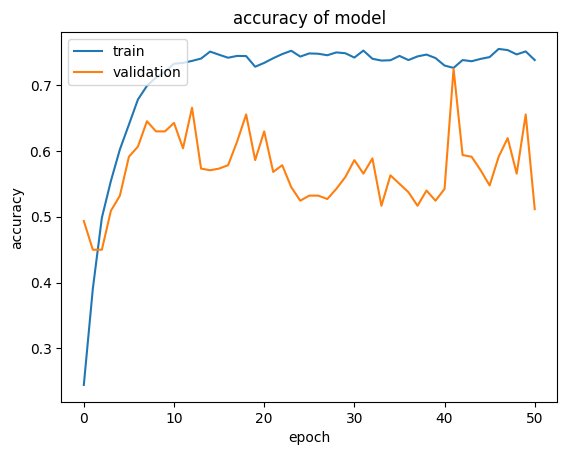

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

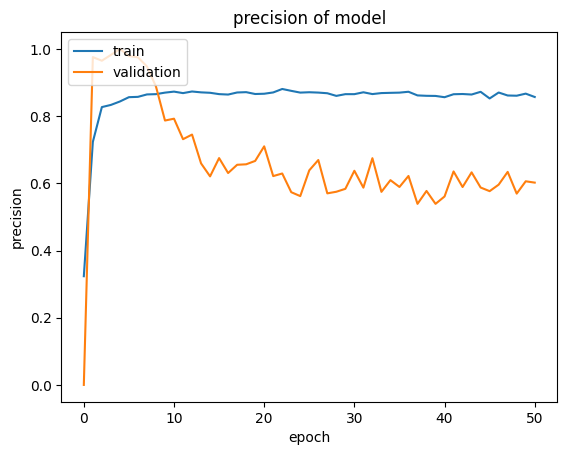

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('precision of model')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

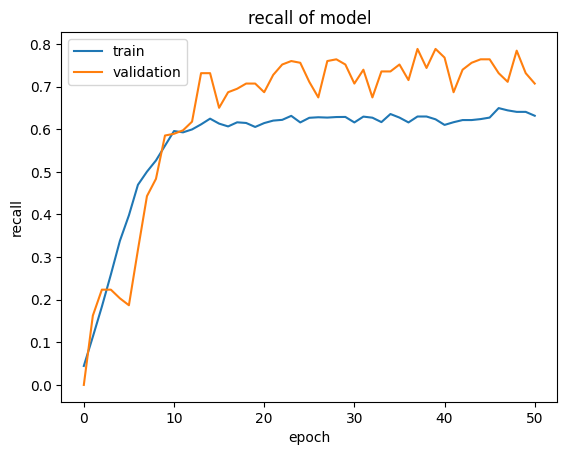

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('recall of model')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

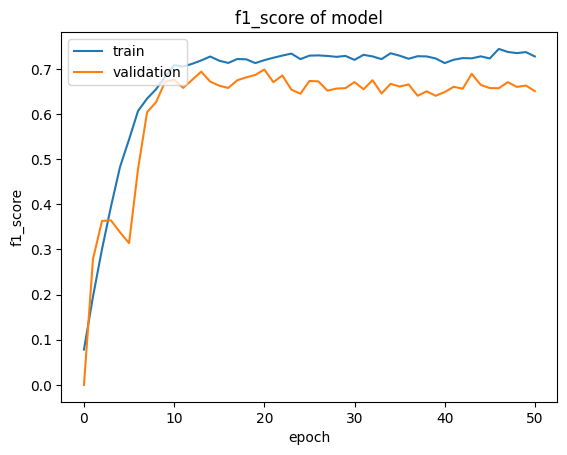

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('f1_score of model')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()